# Get lemmas of articles

In [1]:
import lib as l
import lib.utils as U
import lib.constants as C
import lib.keywords as KW
import lib.lemmas as SP
import lib.plots as PL

### 1. Load data

In [2]:
kw_dict = C.IRON
kw = "iron"

In [ ]:
keywords_fr =  kw_dict["fr"]

df_figaro = U.load_df("France")
df_figaro_kw = KW.get_keyword_df(df_figaro, keywords_fr, "fr")

In [4]:
keywords_sp =  kw_dict["sp"]

df_imparcial = U.load_df("Spain")
df_imparcial_kw = KW.get_keyword_df(df_imparcial, keywords_sp, "sp")

Loaded data from Spain, took 52.232 seconds
Dataset has size (23008, 2) and columns ['date' 'text']
Filtering for words [' hierro '] done, took 29.923 seconds
Size is (10815, 2).
Splitting articles done, took 19.349 seconds. New length is : (15413, 3)


In [5]:
keywords_eng = kw_dict["eng"]

df_nyh = U.load_df("USA")
df_nyh_kw = KW.get_keyword_df(df_nyh, keywords_eng, "eng")

Loaded data from USA, took 4.919 minutes
Dataset has size (147709, 3) and columns ['date' 'text' 'height']
Filtering for words [' iron '] done, took 13.514 seconds
Size is (78272, 3).
Splitting articles done, took 6.184 minutes. New length is : (78272, 4)


In [6]:
keywords_ger = kw_dict["ger"]

df_nhz = U.load_df("Hamburg")
df_nhz_kw = KW.get_keyword_df(df_nhz, keywords_ger, "ger")

Loaded data from Hamburg, took 3.473 minutes
Dataset has size (379671, 3) and columns ['date' 'text' 'height']
Filtering for words [' eisen '] done, took 1.273 minutes
Size is (20769, 3).


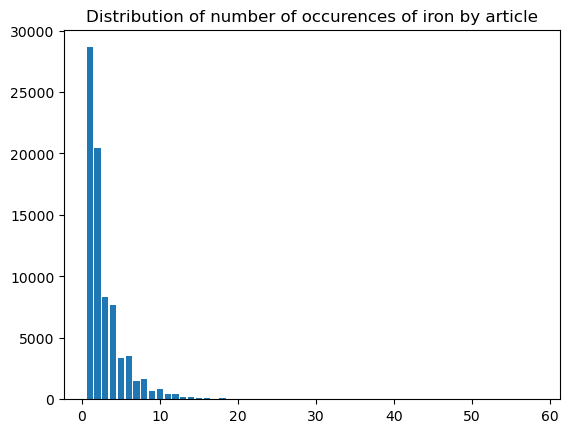

In [13]:
l.PL.plot_occurences(df_nyh_kw, kw, [" iron "])

In [16]:
df_nyh_kw = df_nyh_kw.loc[df_nyh_kw.num_of_iron > 1]

### 2. Run Spacy

In [17]:
df_figaro_kw = SP.process_df(df_figaro_kw, 25, "fr")

30729


In [18]:
df_imparcial_kw = SP.process_df(df_imparcial_kw, 25, "sp")

15413


In [19]:
df_nyh_kw = SP.process_df(df_nyh_kw, 25, "eng")

49632


In [20]:
df_nhz_kw = SP.process_df(df_nhz_kw, 25, "ger")

20769


### 3. Store dataframes

In [21]:
def drop_columns(df, kw):
    if "text" in df.columns.values:
        df = df.drop(columns=["text"])
    if "height" in df.columns.values:
        df = df.drop(columns=["height"])
    if "num_of_" + kw in df.columns.values:
        df = df.drop(columns=["num_of_" + kw])
    return df

In [22]:
df_figaro_kw = drop_columns(df_figaro_kw, kw)
U.compress(df_figaro_kw, U.get_keyword_dataframe_name("fr", kw, is_parent=True))

In [23]:
df_imparcial_kw = drop_columns(df_imparcial_kw, kw)
U.compress(df_imparcial_kw, U.get_keyword_dataframe_name("sp", kw, is_parent=True))

In [24]:
df_nyh_kw = drop_columns(df_nyh_kw, kw)
U.compress(df_nyh_kw, U.get_keyword_dataframe_name("eng", kw, is_parent=True))

In [25]:
df_nhz_kw = drop_columns(df_nhz_kw, kw)
U.compress(df_nhz_kw, U.get_keyword_dataframe_name("ger", kw, is_parent=True))

### Analyse results

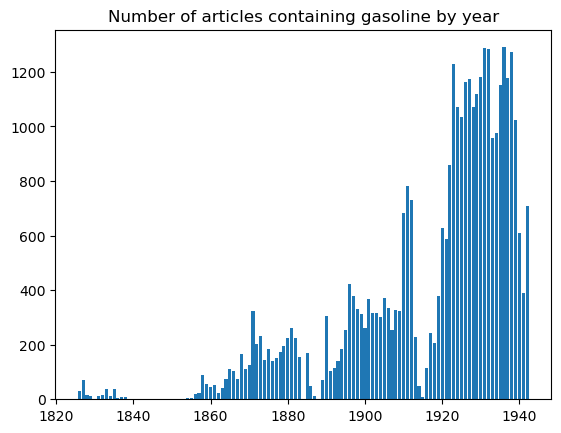

In [17]:
PL.plot_articles_over_time(df_figaro_kw, kw)

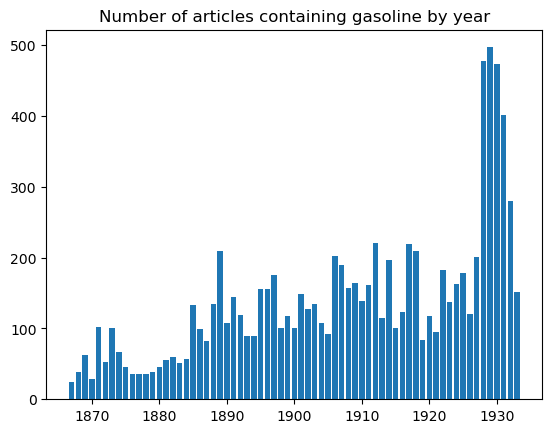

In [19]:
PL.plot_articles_over_time(df_imparcial_kw, kw)

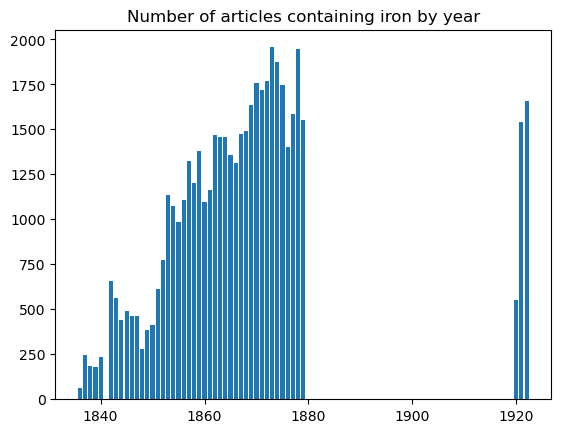

In [26]:
PL.plot_articles_over_time(df_nyh_kw, kw)

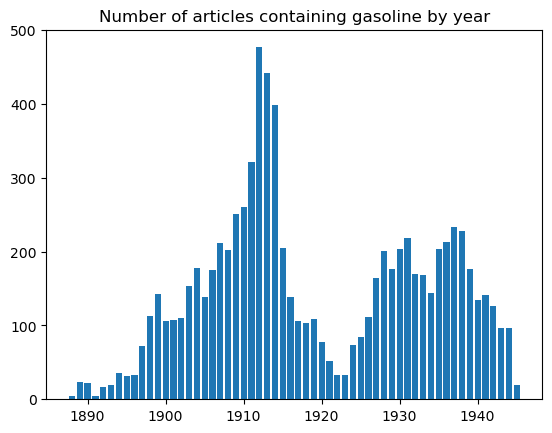

In [21]:
PL.plot_articles_over_time(df_nhz_kw, kw)